In [1]:
from image.image import Image
from image.markers import MarkerContainer, Marker
from filters.filters import BaseFilter2D
import filters.filters_2dim as filters_2d
from segmentation.segmentation_per_pixels.segmentation2d import Segmentation

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
path_to_image = 'data/2.png'
dim = 2


image_2_markers = {'data/1.png': 'data/markers_1.txt', 'data/2.png': 'data/markers_2.txt', 'data/3.png': 'data/markers_3.txt'}
def scale(figsize=(10, 10)):
    plt.figure(figsize=figsize)

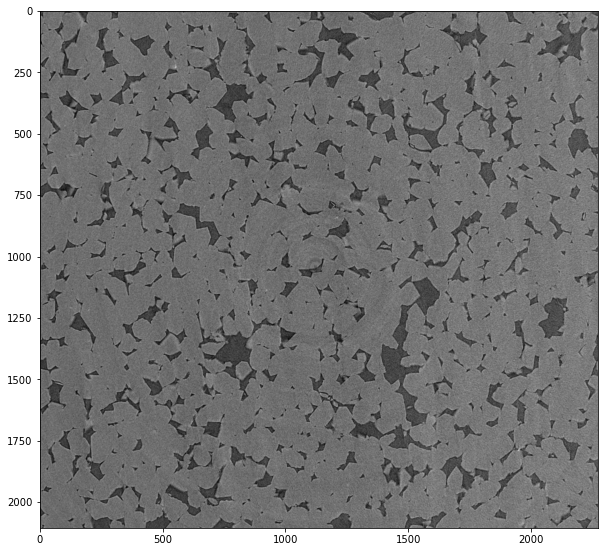

In [3]:
image = Image(path_to_image=path_to_image, dim = dim) # open image 
scale()
image.show()

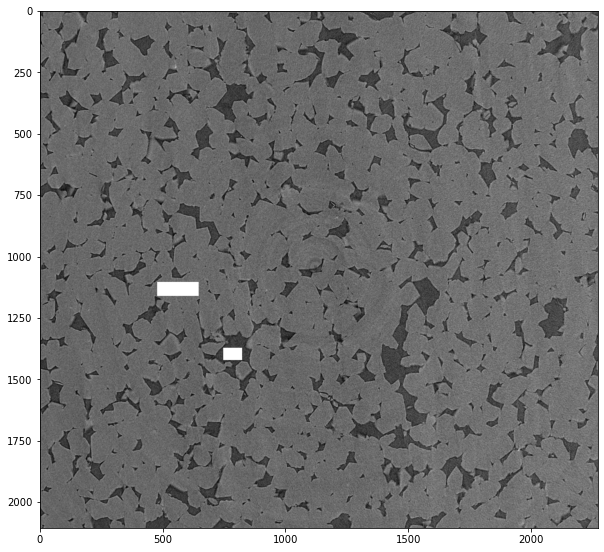

In [4]:
# set markers with classes from file
markers = MarkerContainer()
markers.from_file(image_2_markers[path_to_image])
scale()
image.draw_marker(markers)
image.show()
image.reset()

In [5]:
sgm = Segmentation(RandomForestClassifier())                                                # set model to segmentation 
sgm.segmentate(image, markers, [filters_2d.MedianFilter(5), filters_2d.GaussianFilter(5), 
               filters_2d.LaplacianDifference(),filters_2d.BaseFilter2D()])             # segmentation with filters & markers
print('Finish')

Appplying filters...
Making test data...
Fitting model...
Making predictions...
Transforming result...


marker class = 1


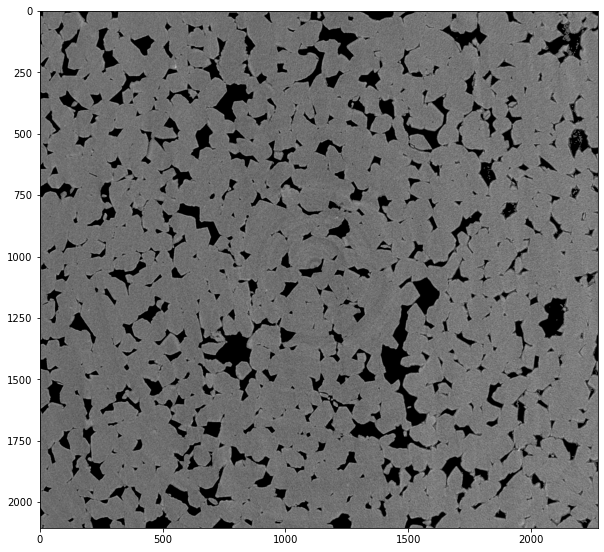

marker class = 0


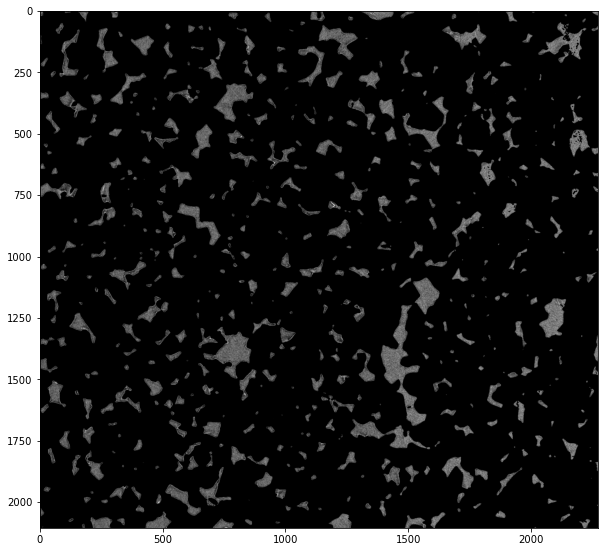

{'Median Filter': 0.41048132934766374, 'Gaussian Filter': 0.4704442232127063, 'Laplacian Difference': 0.0, 'Base Filter': 0.11907444743962996}


In [6]:
scale()
image.show_segments(markers[0], fill_color=0)                                           # show 1 class

scale()
image.show_segments(markers[1])                                                        # show 0 class

print(sgm.feature_weights())